In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statistics as stat
from scipy import stats
import seaborn as sns
import math as math
import seaborn as sb

# Question 2

In [2]:
fomc = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/FOMC.csv")
fomc = fomc.rename(columns={"Calendar Date": "Date", "Value-Weighted Return-incl. dividends": "ret"})

In [3]:
fomc

,Date,FOMC,ret
0,19800102,0,-0.020016
1,19800103,0,-0.004558
2,19800104,0,0.012308
3,19800107,0,0.003118
4,19800108,0,0.021196
...,...,...,...
9328,20161223,0,0.001354
9329,20161227,0,0.002297
9330,20161228,0,-0.008145
9331,20161229,0,-0.000246


In [4]:
fomc.Date = pd.to_datetime(fomc.Date, format = '%Y%m%d',errors = 'ignore')
fomc.set_index('Date',inplace = True)

In [5]:
fomc2 = fomc['1993-01-01':'2016-12-30']

In [6]:
sum(fomc2.FOMC)

186

In [7]:
mean_return = fomc2[fomc2.FOMC!=1].ret.mean()
print(mean_return*100)

0.03286151220344779


In [8]:
fomc_no_ann = fomc2[fomc2.FOMC !=1]

In [9]:
x_val = np.repeat(1,len(fomc_no_ann))
ret_ols = sm.OLS(fomc_no_ann.ret,x_val).fit()
print(ret_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 14 Apr 2020   Prob (F-statistic):                nan
Time:                        16:47:15   Log-Likelihood:                 17846.
No. Observations:                5859   AIC:                        -3.569e+04
Df Residuals:                    5858   BIC:                        -3.568e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.186      0.0

/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


In [10]:
ret_ols.params

const    0.000329
dtype: float64

In [11]:
ab_rets = []
for i in range(len(fomc2)):
    if fomc2.FOMC[i] == 1:
        ab_rets.append(fomc2.ret[i] - ret_ols.params[0])

In [12]:
np.array(ab_rets).mean()*100
#average abnormal returns using constant mean model

0.2902884877965523

In [13]:
#calculating average abnormal returns by subtracting the mean
ab_rets = []
for i in range(len(fomc2)):
    if fomc2.FOMC[i] == 1:
        ab_rets.append(fomc2.ret[i] - mean_return)

sigma_bar = (np.sum(np.array(ab_rets)**2)/186**2)**0.5
avg_car = np.array(ab_rets).mean()

In [14]:
print('Volatility of Abnormal Returns:',sigma_bar*100)
print('Average Abnormal Returns:',avg_car*100)

Volatility of Abnormal Returns: 0.086192127793902
Average Abnormal Returns: 0.2902884877965523


In [15]:
stat = avg_car/sigma_bar
print('Test-statistic for the significance of Abnormal Returns',stat)

Test-statistic for the significance of Abnormal Returns 3.3679234429700426


In [16]:
ab_rets = np.array(ab_rets)*100
ab_rets2 = (fomc2[fomc2.FOMC != 1].ret - mean_return)*100

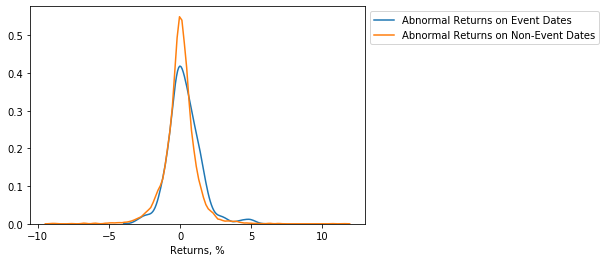

In [17]:
#kernel density plots
sb.distplot(ab_rets,hist=False, label = 'Abnormal Returns on Event Dates')
sb.distplot(ab_rets2,hist=False, label = 'Abnormal Returns on Non-Event Dates')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Returns, %')
plt.show()

## Index for high yield corporate bonds

In [18]:
high_yield = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/BAMLH0A0HYM2EY.csv")
high_yield.head()

,DATE,ret
0,12/31/96,9.55
1,1/1/97,NaN
2,1/2/97,9.57
3,1/3/97,9.58
4,1/6/97,9.61


In [19]:
high_yield.DATE = pd.to_datetime(high_yield.DATE, format = '%m/%d/%y',errors = 'ignore')
high_yield.set_index('DATE',inplace = True)

In [20]:
high_yield = high_yield['1993-01-01':'2016-12-30']

In [21]:
fomc = fomc2.FOMC
hy = pd.concat([high_yield,fomc], axis = 1)
hy.ret = hy.ret/100

In [22]:
sum(hy.FOMC == 1)

186

In [23]:
m = hy[hy.FOMC!=1].ret.mean()
ab_rets = []
for i in range(len(hy)):
    if hy.FOMC[i] == 1:
        ab_rets.append(hy.ret[i] - m)

sigma_bar = (np.nansum(np.array(ab_rets)**2)/160**2)**0.5
avg_car = np.nanmean(np.array(ab_rets))

In [24]:
m*100

9.252766798418977

In [25]:
print('Volatility of Abnormal Returns:',sigma_bar*100)
print('Average Abnormal Returns:',avg_car*100)

Volatility of Abnormal Returns: 0.22801848607827005
Average Abnormal Returns: 0.005045701581023465


In [26]:
stat = avg_car/sigma_bar
print('Test-statistic for the significance of Abnormal Returns',stat)

Test-statistic for the significance of Abnormal Returns 0.022128475931076346


In [27]:
ab_rets = np.array(ab_rets)*100
ab_rets2 = (hy[hy.FOMC != 1].ret - m)*100

/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


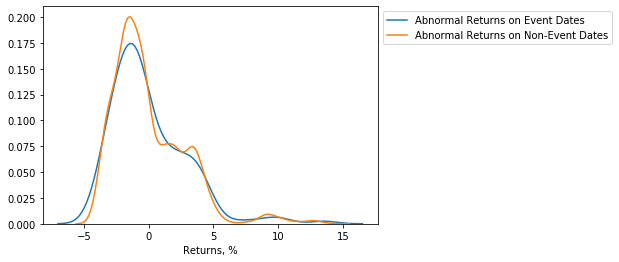

In [28]:
sb.distplot(ab_rets,hist=False, label = 'Abnormal Returns on Event Dates')
sb.distplot(ab_rets2,hist=False, label = 'Abnormal Returns on Non-Event Dates')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Returns, %')
plt.show()

# Question 3

In [111]:
pead = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/PEAD.csv")
market = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/market.csv")

In [112]:
pead = pead.rename(columns={"PERMNO": "permno", "DATE": "date", "RET":"ret"})

In [113]:
len(pead.permno.unique())

1000

In [114]:
market = market.rename(columns={"DATE": "date"})

In [115]:
pead.date = pd.to_datetime(pead.date, format = '%Y%m%d',errors = 'ignore')
pead.set_index('date',inplace = True)
market.date = pd.to_datetime(market.date, format = '%Y%m%d',errors = 'ignore')
market.set_index('date',inplace = True)

In [116]:
pead_m = pd.merge(pead,market,left_index = True,right_index = True)

## Part a

In [117]:
len(set(pead.permno))

1000

In [118]:
#pead_m = pead_m.dropna()

In [119]:
pead_m['exret'] = pead_m.ret-pead_m.ret_m

In [120]:
pead_m['roll_sd'] = pead_m.groupby('permno')['exret'].transform(lambda x: x.rolling(60).std())

In [121]:
pead_m.isna().sum()

permno         0
ret           19
cap            9
ann            0
ret_m          0
exret         19
roll_sd    59418
dtype: int64

In [122]:
pead_ann = pead_m[pead_m.ann == 1]
print(pead_ann)
pead_ann['exret_sd'] = ""

            permno       ret           cap  ann     ret_m     exret   roll_sd
date                                                                         
2011-01-05   90386  0.028400  3.437329e+07    1  0.005377  0.023023       NaN
2011-01-06   53866 -0.013336  5.610230e+06    1 -0.002525 -0.010811       NaN
2011-01-07   65307  0.006748  2.910228e+06    1 -0.001951  0.008699       NaN
2011-01-07   69796 -0.017641  3.657493e+06    1 -0.001951 -0.015690       NaN
2011-01-07   80032 -0.048124  2.825048e+06    1 -0.001951 -0.046173       NaN
...            ...       ...           ...  ...       ...       ...       ...
2018-12-21   19502 -0.033759  6.345611e+07    1 -0.020586 -0.013173  0.011603
2018-12-21   23660  0.005848  1.710015e+07    1 -0.020586  0.026434  0.010414
2018-12-21   56274 -0.087727  1.075631e+07    1 -0.020586 -0.067141  0.031533
2018-12-21   57665  0.071672  9.213186e+07    1 -0.020586  0.092258  0.016797
2018-12-24   89508  0.001526  1.031137e+07    1 -0.024171  0.025

/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
def ex_ret_calc(row):
    return (row['exret'])/row['roll_sd']

pead_ann.exret_sd = pead_ann.apply(ex_ret_calc,axis = 1)

/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [124]:
exret_sd = pead_ann[['permno','exret_sd']]

In [125]:
#pead_ann['date'] = pead_ann.index
#exret_sd['date'] = exret_sd.index

In [126]:
pead_m = pd.merge(pead_m, exret_sd,  how='left', left_on=['date','permno'], right_on = ['date','permno'])

In [135]:
pead_m = pead_m.sort_values(by=['permno','date'],ascending = [True,True])

In [136]:
pead_m['avg_30'] = pead_m.groupby('permno')['exret'].transform(lambda x: x.rolling(30).mean().shift(-30))
pead_m['cum30'] = pead_m.groupby('permno')['exret'].transform(lambda x: x.rolling(30).sum().shift(-30))

In [139]:
pead_m.isna().sum()

permno            0
ret              77
cap               9
ann               0
ret_m             0
exret            77
roll_sd       59476
exret_sd    1700854
avg_30        30344
cum30         30344
dtype: int64

In [140]:
high = pead_m[(pead_m.ann == 1) & (pead_m.exret_sd >3)]
low = pead_m[(pead_m.ann == 1) & (pead_m.exret_sd <-3)]

In [143]:
print(high.shape)
print(low.shape)

(2702, 10)
(2627, 10)


In [153]:
print(round(high.avg_30.mean(),4))
print(low.avg_30.mean())
print(round(high.cum30.mean(),5))
print(round(low.cum30.mean(),4))

0.0002
4.310358738669777e-05
0.00635
0.0013


In [154]:
tstat_high = high.avg_30.mean()/(high.avg_30.std()/math.sqrt(len(high)))
print(tstat_high)

4.0841922189951765


In [155]:
tstat_low = low.avg_30.mean()/(low.avg_30.std()/math.sqrt(len(low)))
print(tstat_low)

0.7413008127038351


##  Part b

In [158]:
high['date'] = high.index
low['date'] = low.index

/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [159]:
high = high.reset_index(drop = True)
low = low.reset_index(drop = True)

In [160]:
high = high.sort_values(by=['permno','date'],ascending = [True,True])
low = low.sort_values(by=['permno','date'],ascending = [True,True])

,permno,ret,cap,ann,ret_m,exret,roll_sd,exret_sd,avg_30,cum30,date
0,10104,0.041975,1.490175e+08,1,-0.029438,0.071413,0.015330,4.658306,0.001060,0.031815,2011-09-21
1,10104,0.036800,1.613922e+08,1,-0.004647,0.041447,0.009678,4.282566,-0.000496,-0.014866,2012-12-19
2,10104,0.057803,1.668030e+08,1,-0.001018,0.058821,0.011044,5.326017,0.000257,0.007702,2013-12-19
3,10104,0.101798,2.009596e+08,1,0.021551,0.080247,0.013810,5.810754,-0.001704,-0.051109,2014-12-18
4,10104,0.038203,1.689731e+08,1,0.007492,0.030711,0.008067,3.807125,-0.000903,-0.027086,2016-03-16
...,...,...,...,...,...,...,...,...,...,...,...
2697,93436,0.096474,3.467853e+06,1,0.002875,0.093599,0.026693,3.506503,0.002145,0.064339,2012-05-10
2698,93436,0.244029,8.019378e+06,1,-0.003687,0.247716,0.047852,5.176706,0.014282,0.428473,2013-05-09
2699,93436,0.143411,1.864015e+07,1,0.005442,0.137969,0.044431,3.105251,0.005735,0.172055,2013-08-08
2700,93436,0.111735,3.033218e+07,1,-0.003391,0.115126,0.026357,4.367993,0.001714,0.051428,2015-11-04


In [161]:
ret_series = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/rets.csv")
ret_series = ret_series.iloc[:,2:]
ret_series

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,0.000320,0.002154,-0.006150,0.004983,0.003776,0.000000,-0.002945,-0.006599,-0.008230,-0.006605,...,0.005283,0.000000,0.016181,0.000000,-0.016393,-0.020324,-0.015028,0.007804,0.008331,0.004906
1,0.010224,0.002508,0.019389,0.019213,0.019752,0.009170,0.013857,0.018367,0.007801,0.002602,...,0.023184,0.004061,-0.015924,0.070434,0.019565,0.017864,0.002474,0.037979,0.005784,-0.000375
2,-0.004428,0.003842,0.007689,-0.022803,-0.013466,-0.000433,-0.010531,-0.011512,-0.006423,-0.004325,...,0.056496,0.024120,0.002158,0.013772,0.002843,0.001698,-0.002468,-0.026288,-0.000274,0.001878
3,-0.013977,-0.003115,0.002008,0.013690,0.016642,0.014286,0.000906,0.015916,-0.000497,-0.000869,...,0.043752,0.017554,0.006243,-0.003019,-0.008505,0.006594,0.003711,0.001459,0.001917,0.005999
4,0.004188,0.029286,0.004008,0.000000,-0.000184,0.010243,0.010181,0.005732,0.024876,0.005797,...,-0.003288,-0.008482,0.011767,0.002271,0.002144,0.019839,0.016434,-0.029144,0.000273,0.039135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,-0.029773,-0.041739,NaN,-0.021088,-0.035615,NaN,-0.033256,-0.010764,NaN,NaN,...,-0.005012,NaN,-0.033866,NaN,-0.019054,NaN,-0.044542,-0.057654,-0.037665,-0.076242
2009,0.044507,0.068310,NaN,0.055327,0.037972,NaN,0.048878,0.022035,NaN,NaN,...,0.046710,NaN,0.066741,NaN,0.033828,NaN,0.065660,0.135021,0.105675,0.103930
2010,0.008522,0.006166,NaN,0.018516,0.015436,NaN,0.023553,-0.008784,NaN,NaN,...,0.026542,NaN,0.001577,NaN,-0.000422,NaN,-0.003697,0.035316,0.017699,-0.030544
2011,-0.003336,-0.007808,NaN,0.000329,-0.006157,NaN,0.000990,-0.008593,NaN,NaN,...,-0.000710,NaN,-0.000525,NaN,-0.014995,NaN,-0.008864,-0.019749,-0.026087,0.056116


In [164]:
weights = np.zeros((2013,1000))
trade_dates= pead_m.index.unique()
stock_ids = pead_m.permno.unique()
theta_f = np.zeros((2013,1))
r_f = np.zeros((2013,1))
dollars_inv = np.zeros((2013,1))
n = 5

In [165]:
date_idx = 0

for d in trade_dates:
    long = np.array(high.permno[high.date == d])
    short = np.array(low.permno[low.date == d])
    
    mask_long = np.isin(stock_ids,long)
    long_ids = np.argwhere(mask_long)
    mask_short = np.isin(stock_ids,short)
    short_ids = np.argwhere(mask_short)
    
    dollars_inv[(date_idx+1) : (date_idx+n+1),] += (len(long) + len(short))
    
    weights[(date_idx+1) : (date_idx+n+1),long_ids] +=1
    weights[(date_idx+1) : (date_idx+n+1),short_ids] +=-1
    
    th_f= -(len(long) - len(short))
    theta_f[(date_idx+1) : (date_idx+n+1),] = -(len(long) - len(short))
    
    if th_f <0: #net long
        r_f[(date_idx+1) : (date_idx+n+1),] = -0.03/252
    if th_f ==0:
        r_f[(date_idx+1) : (date_idx+n+1),] = 0
    else:
        r_f[(date_idx+1) : (date_idx+n+1),] = 0.01/252
        
    date_idx = date_idx + 1
    
theta_f = theta_f.astype('float')
theta_f[theta_f == 0] = None
theta_f = abs(theta_f)
print(np.nansum(theta_f))

rets_5 = np.array(np.sum(weights*ret_series,axis = 1)).reshape(-1,1)
rets_5 = (rets_5 + r_f*theta_f)/(theta_f+dollars_inv)
cum_rets_5 = np.nancumprod(1+rets_5)

1867.0


In [166]:
weights = np.zeros((2013,1000))
trade_dates= pead_m.index.unique()
stock_ids = pead_m.permno.unique()
theta_f = np.zeros((2013,1))
r_f = np.zeros((2013,1))
dollars_inv = np.zeros((2013,1))
n = 10

date_idx = 0

for d in trade_dates:
    long = np.array(high.permno[high.date == d])
    short = np.array(low.permno[low.date == d])
    
    mask_long = np.isin(stock_ids,long)
    long_ids = np.argwhere(mask_long)
    mask_short = np.isin(stock_ids,short)
    short_ids = np.argwhere(mask_short)
    
    dollars_inv[(date_idx+1) : (date_idx+n+1),] += (len(long) + len(short))
    
    weights[(date_idx+1) : (date_idx+n+1),long_ids] +=1
    weights[(date_idx+1) : (date_idx+n+1),short_ids] +=-1
    
    th_f= -(len(long) - len(short))
    theta_f[(date_idx+1) : (date_idx+n+1),] += -(len(long) - len(short))
    
    if th_f <0: #net long
        r_f[(date_idx+1) : (date_idx+n+1),] = -0.03/252
    if th_f ==0:
        r_f[(date_idx+1) : (date_idx+n+1),] = 0
    else:
        r_f[(date_idx+1) : (date_idx+n+1),] = 0.01/252
        
    date_idx = date_idx + 1
    
theta_f = theta_f.astype('float')
theta_f[theta_f == 0] = None
theta_f = abs(theta_f)
print(np.nansum(theta_f))

rets_10 = np.array(np.sum(weights*ret_series,axis = 1)).reshape(-1,1)
rets_10 = (rets_10 + r_f*theta_f)/(theta_f+dollars_inv)
cum_rets_10 = np.nancumprod(1+rets_10)

7501.0


In [167]:
weights = np.zeros((2013,1000))
trade_dates= pead_m.index.unique()
stock_ids = pead_m.permno.unique()
theta_f = np.zeros((2013,1))
r_f = np.zeros((2013,1))
dollars_inv = np.zeros((2013,1))
n = 20

date_idx = 0

for d in trade_dates:
    long = np.array(high.permno[high.date == d])
    short = np.array(low.permno[low.date == d])
    
    mask_long = np.isin(stock_ids,long)
    long_ids = np.argwhere(mask_long)
    mask_short = np.isin(stock_ids,short)
    short_ids = np.argwhere(mask_short)
    
    dollars_inv[(date_idx+1) : (date_idx+n+1),] += (len(long) + len(short))
    
    weights[(date_idx+1) : (date_idx+n+1),long_ids] +=1
    weights[(date_idx+1) : (date_idx+n+1),short_ids] +=-1
    
    th_f= -(len(long) - len(short))
    theta_f[(date_idx+1) : (date_idx+n+1),] += -(len(long) - len(short))
    
    if th_f <0: #net long
        r_f[(date_idx+1) : (date_idx+n+1),] = -0.03/252
    if th_f ==0:
        r_f[(date_idx+1) : (date_idx+n+1),] = 0
    else:
        r_f[(date_idx+1) : (date_idx+n+1),] = 0.01/252
        
    date_idx = date_idx + 1
    
theta_f = theta_f.astype('float')
theta_f[theta_f == 0] = None
theta_f = abs(theta_f)
print(np.nansum(theta_f))

rets_20 = np.array(np.sum(weights*ret_series,axis = 1)).reshape(-1,1)
rets_20 = (rets_20 + r_f*theta_f)/(theta_f+dollars_inv)
cum_rets_20 = np.nancumprod(1+rets_20)

10992.0


In [168]:
weights = np.zeros((2013,1000))
trade_dates= pead_m.index.unique()
stock_ids = pead_m.permno.unique()
theta_f = np.zeros((2013,1))
r_f = np.zeros((2013,1))
dollars_inv = np.zeros((2013,1))
n = 30

date_idx = 0

for d in trade_dates:
    long = np.array(high.permno[high.date == d])
    short = np.array(low.permno[low.date == d])
    
    mask_long = np.isin(stock_ids,long)
    long_ids = np.argwhere(mask_long)
    mask_short = np.isin(stock_ids,short)
    short_ids = np.argwhere(mask_short)
    
    dollars_inv[(date_idx+1) : (date_idx+n+1),] += (len(long) + len(short))
    
    weights[(date_idx+1) : (date_idx+n+1),long_ids] +=1
    weights[(date_idx+1) : (date_idx+n+1),short_ids] +=-1
    
    th_f= -(len(long) - len(short))
    theta_f[(date_idx+1) : (date_idx+n+1),] += -(len(long) - len(short))
    
    if th_f <0: #net long
        r_f[(date_idx+1) : (date_idx+n+1),] = -0.03/252
    if th_f ==0:
        r_f[(date_idx+1) : (date_idx+n+1),] = 0
    else:
        r_f[(date_idx+1) : (date_idx+n+1),] = 0.01/252
        
    date_idx = date_idx + 1
    
theta_f = theta_f.astype('float')
theta_f[theta_f == 0] = None
theta_f = abs(theta_f)
print(np.nansum(theta_f))

rets_30 = np.array(np.sum(weights*ret_series,axis = 1)).reshape(-1,1)
rets_30 = (rets_30 + r_f*theta_f)/(theta_f+dollars_inv)
cum_rets_30 = np.nancumprod(1+rets_30)

14452.0


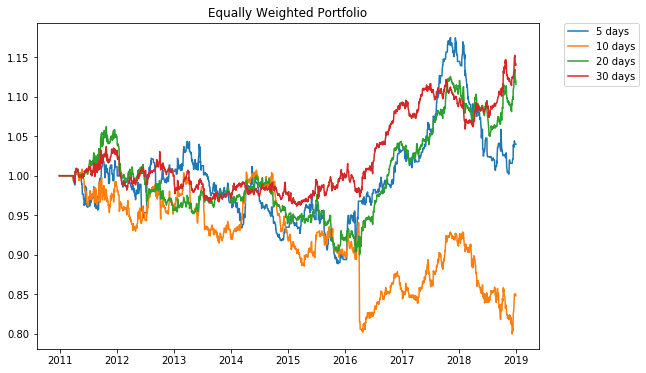

In [173]:
plt.figure(figsize=(9,6))
plt.plot(trade_dates,cum_rets_5, label = '5 days')
plt.plot(trade_dates,cum_rets_10, label = '10 days')
plt.plot(trade_dates,cum_rets_20, label = '20 days')
plt.plot(trade_dates,cum_rets_30, label = '30 days')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Equally Weighted Portfolio')
plt.show()

In [174]:
rets_5 = rets_5.reshape(-1)
rets_10 = rets_10.reshape(-1)
rets_20 = rets_20.reshape(-1)
rets_30 = rets_30.reshape(-1)

In [175]:
exrets_5 = rets_5- market.ret_m
exrets_10 = rets_10- market.ret_m
exrets_20 = rets_20- market.ret_m
exrets_30 = rets_30- market.ret_m

## Part c: Analysis of portfolio returns

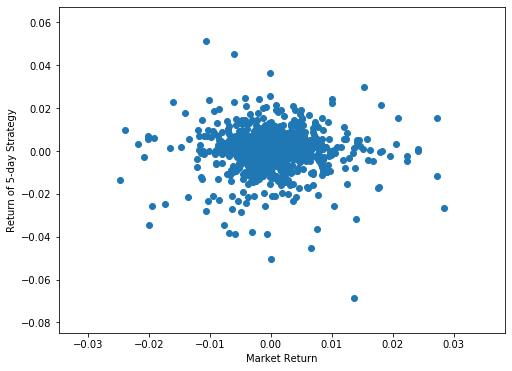

In [176]:
plt.figure(figsize=(8,6))
plt.scatter(x = rets_5, y = market.ret_m)
plt.xlabel("Market Return")
plt.ylabel("Return of 5-day Strategy")
plt.show()

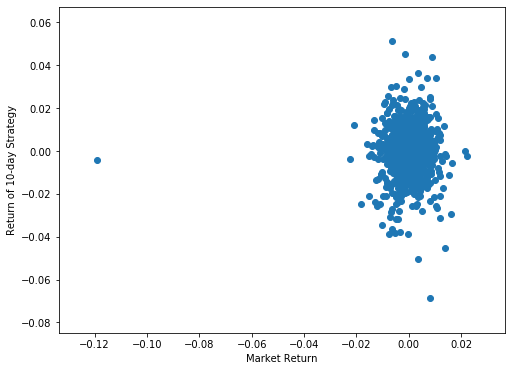

In [178]:
plt.figure(figsize=(8,6))
plt.scatter(x = rets_10, y = market.ret_m)
plt.xlabel("Market Return")
plt.ylabel("Return of 10-day Strategy")
plt.show()

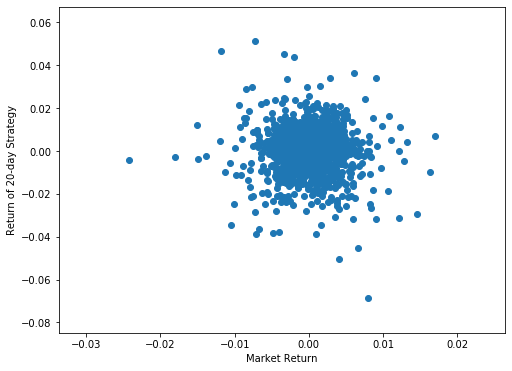

In [180]:
plt.figure(figsize=(8,6))
plt.scatter(x = rets_20, y = market.ret_m)
plt.xlabel("Market Return")
plt.ylabel("Return of 20-day Strategy")
plt.show()

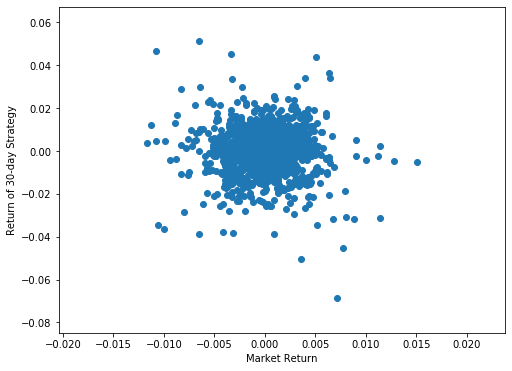

In [179]:
plt.figure(figsize=(8,6))
plt.scatter(x = rets_30, y = market.ret_m)
plt.xlabel("Market Return")
plt.ylabel("Return of 30-day Strategy")
plt.show()

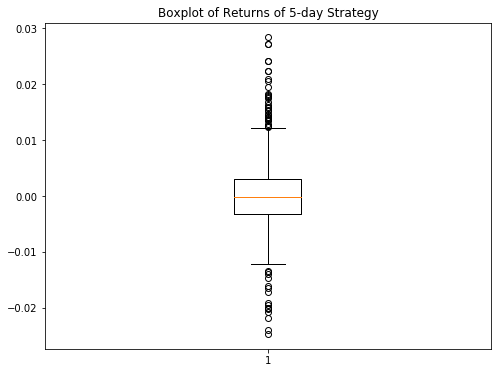

In [187]:
filtered_data = rets_5[~np.isnan(rets_5)]
plt.figure(figsize=(8,6))
plt.boxplot(filtered_data)
plt.title('Boxplot of Returns of 5-day Strategy')
plt.show()

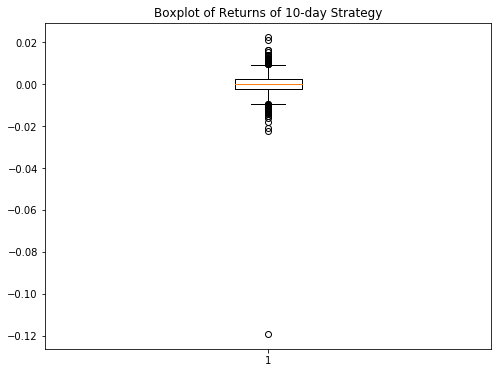

In [188]:
filtered_data = rets_10[~np.isnan(rets_10)]
plt.figure(figsize=(8,6))
plt.boxplot(filtered_data)
plt.title('Boxplot of Returns of 10-day Strategy')
plt.show()

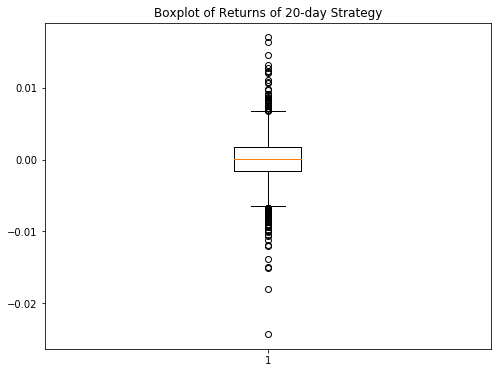

In [189]:
filtered_data = rets_20[~np.isnan(rets_20)]
plt.figure(figsize=(8,6))
plt.boxplot(filtered_data)
plt.title('Boxplot of Returns of 20-day Strategy')
plt.show()

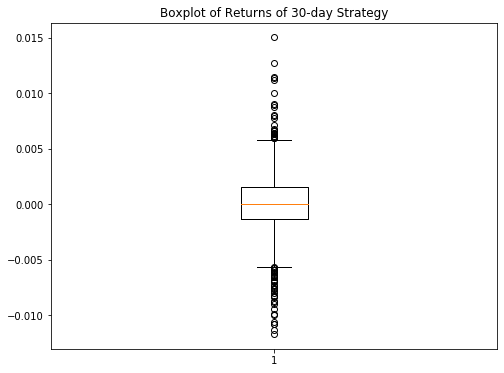

In [190]:
filtered_data = rets_30[~np.isnan(rets_30)]
plt.figure(figsize=(8,6))
plt.boxplot(filtered_data)
plt.title('Boxplot of Returns of 30-day Strategy')
plt.show()

In [191]:
#mean
print("Annualized Mean Return with 5 days: ",round(np.nanmean(exrets_5)*252*100,3))
print("Annualized Mean Return with 10 days: ",round(np.nanmean(exrets_10)*252*100,3))
print("Annualized Mean Return with 20 days: ",round(np.nanmean(exrets_20)*252*100,3))
print("Annualized Mean Return with 30 days: ",round(np.nanmean(exrets_30)*252*100,3))

#standard deviation
print("Annualized Standard Deviation of Excess Returns for 5 days: ",round(np.nanstd(exrets_5)*math.sqrt(252)*100,3))
print("Annualized Standard Deviation of Excess Returns for 10 days: ",round(np.nanstd(exrets_10)*math.sqrt(252)*100,3))
print("Annualized Standard Deviation of Excess Returns for 20 days: ",round(np.nanstd(exrets_20)*math.sqrt(252)*100,3))
print("Annualized Standard Deviation of Excess Returns for 30 days: ",round(np.nanstd(exrets_30)*math.sqrt(252)*100,3))

#Sharpe Ratio
print("5 day Sharpe Ratio: ",round(np.nanmean(exrets_5)/np.nanstd(exrets_5)*math.sqrt(252),3))
print("10 day Sharpe Ratio: ",round(np.nanmean(exrets_10)/np.nanstd(exrets_10)*math.sqrt(252),3))
print("20 day Sharpe Ratio: ",round(np.nanmean(exrets_20)/np.nanstd(exrets_20)*math.sqrt(252),3))
print("30 day Sharpe Ratio: ",round(np.nanmean(exrets_30)/np.nanstd(exrets_30)*math.sqrt(252),3))

Annualized Mean Return with 5 days:  -2.949
Annualized Mean Return with 10 days:  -11.671
Annualized Mean Return with 20 days:  -6.502
Annualized Mean Return with 30 days:  -7.565
Annualized Standard Deviation of Excess Returns for 5 days:  18.039
Annualized Standard Deviation of Excess Returns for 10 days:  16.69
Annualized Standard Deviation of Excess Returns for 20 days:  15.864
Annualized Standard Deviation of Excess Returns for 30 days:  15.451
5 day Sharpe Ratio:  -0.163
10 day Sharpe Ratio:  -0.699
20 day Sharpe Ratio:  -0.41
30 day Sharpe Ratio:  -0.49


In [192]:
#information ratio
IR_5 = (np.nanmean(rets_5)-market.ret_m.mean())/((rets_5-market.ret_m).std())
IR_10 = (np.nanmean(rets_10)-market.ret_m.mean())/((rets_10-market.ret_m).std())
IR_20 = (np.nanmean(rets_20)-market.ret_m.mean())/((rets_20-market.ret_m).std())
IR_30 = (np.nanmean(rets_30)-market.ret_m.mean())/((rets_30-market.ret_m).std())

print("Information Ratio of 5 day Strategy: ",round(IR_5*math.sqrt(252),3))
print("Information Ratio of 10 day Strategy: ",round(IR_10*math.sqrt(252),3))
print("Information Ratio of 20 day Strategy: ",round(IR_20*math.sqrt(252),3))
print("Information Ratio of 30 day Strategy: ",round(IR_30*math.sqrt(252),3))

Information Ratio of 5 day Strategy:  -0.482
Information Ratio of 10 day Strategy:  -0.735
Information Ratio of 20 day Strategy:  -0.537
Information Ratio of 30 day Strategy:  -0.537


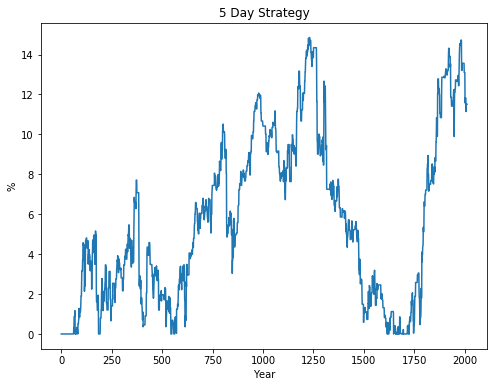

Max Drawdown of 5 Day Strategy is:  14.854


In [193]:
#max drawdown 5 day strategy
max_val = 0
drawdown = []
for i in range(cum_rets_5.shape[0]):
    if cum_rets_5[i] > max_val:
        max_val = cum_rets_5[i]
    drawdown.append((max_val - cum_rets_5[i])/max_val)
drawdown = pd.DataFrame(drawdown)
plt.figure(figsize=(8,6))
plt.plot(drawdown*100)
plt.xlabel("Year")
plt.ylabel("%")
plt.title("5 Day Strategy")
plt.show()

print("Max Drawdown of 5 Day Strategy is: ",round(drawdown[0].max()*100,3))

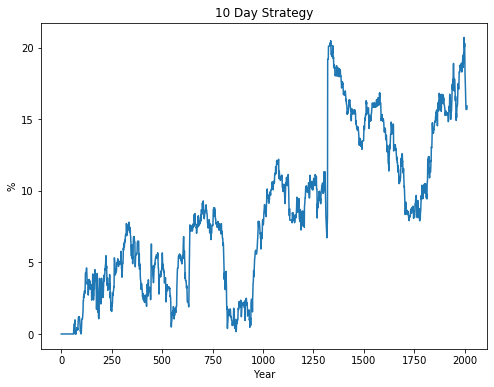

Max Drawdown of 10 Day Strategy is:  20.721


In [194]:
#max drawdown 10 day strategy
max_val = 0
drawdown = []
for i in range(cum_rets_10.shape[0]):
    if cum_rets_10[i] > max_val:
        max_val = cum_rets_10[i]
    drawdown.append((max_val - cum_rets_10[i])/max_val)
drawdown = pd.DataFrame(drawdown)
plt.figure(figsize=(8,6))
plt.plot(drawdown*100)
plt.xlabel("Year")
plt.ylabel("%")
plt.title("10 Day Strategy")
plt.show()

print("Max Drawdown of 10 Day Strategy is: ",round(drawdown[0].max()*100,3))

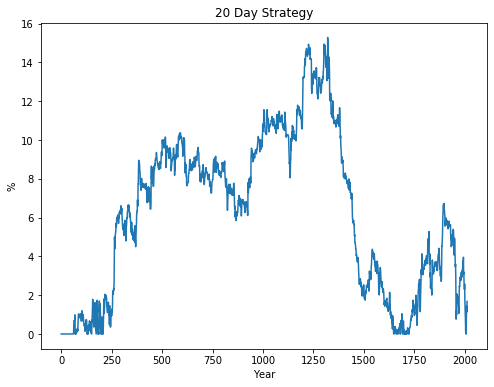

Max Drawdown of 20 Day Strategy is:  15.289


In [195]:
#max drawdown 20 day strategy
max_val = 0
drawdown = []
for i in range(cum_rets_20.shape[0]):
    if cum_rets_20[i] > max_val:
        max_val = cum_rets_20[i]
    drawdown.append((max_val - cum_rets_20[i])/max_val)
drawdown = pd.DataFrame(drawdown)
plt.figure(figsize=(8,6))
plt.plot(drawdown*100)
plt.xlabel("Year")
plt.ylabel("%")
plt.title("20 Day Strategy")
plt.show()

print("Max Drawdown of 20 Day Strategy is: ",round(drawdown[0].max()*100,3))

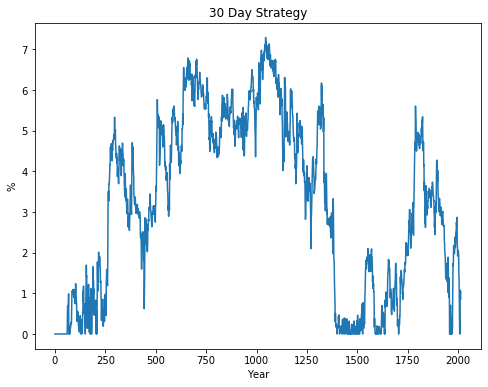

Max Drawdown of 30 Day Strategy is:  7.292


In [196]:
#max drawdown 30 day strategy
max_val = 0
drawdown = []
for i in range(cum_rets_30.shape[0]):
    if cum_rets_30[i] > max_val:
        max_val = cum_rets_30[i]
    drawdown.append((max_val - cum_rets_30[i])/max_val)
drawdown = pd.DataFrame(drawdown)
plt.figure(figsize=(8,6))
plt.plot(drawdown*100)
plt.xlabel("Year")
plt.ylabel("%")
plt.title("30 Day Strategy")
plt.show()

print("Max Drawdown of 30 Day Strategy is: ",round(drawdown[0].max()*100,3))

# Fama French replication

In [204]:
ff_data = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/F-F_Research_Data_Factors_daily 2.CSV")
ff_data.date = pd.to_datetime(ff_data.date, format = '%Y%m%d',errors = 'ignore')
ff_data.set_index('date',inplace = True)
ff_data = ff_data/100

In [205]:
ff_data = ff_data['2010-12-31':'2018-12-31']

In [206]:
exrets_5 = rets_5- ff_data.RF
exrets_10 = rets_10- ff_data.RF
exrets_20 = rets_20- ff_data.RF
exrets_30 = rets_30- ff_data.RF

In [207]:
x_vals = ff_data[['Mkt-RF','SMB','HML']]
x_vals = sm.add_constant(x_vals)
ols_5 = sm.OLS(exrets_5,x_vals, missing = 'drop').fit()
print(ols_5.summary())

                            OLS Regression Results                            
Dep. Variable:                     RF   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.975
Date:                Tue, 14 Apr 2020   Prob (F-statistic):             0.0308
Time:                        22:18:30   Log-Likelihood:                 3527.5
No. Observations:                 957   AIC:                            -7047.
Df Residuals:                     953   BIC:                            -7028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.017e-05      0.000      0.204      0.8

In [208]:
x_vals = ff_data[['Mkt-RF','SMB','HML']]
x_vals = sm.add_constant(x_vals)
ols_10 = sm.OLS(exrets_10,x_vals, missing = 'drop').fit()
print(ols_10.summary())

                            OLS Regression Results                            
Dep. Variable:                     RF   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.298
Date:                Tue, 14 Apr 2020   Prob (F-statistic):            0.00123
Time:                        22:18:31   Log-Likelihood:                 6612.5
No. Observations:                1717   AIC:                        -1.322e+04
Df Residuals:                    1713   BIC:                        -1.320e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.820      0.4

In [209]:
x_vals = ff_data[['Mkt-RF','SMB','HML']]
x_vals = sm.add_constant(x_vals)
ols_20 = sm.OLS(exrets_20,x_vals, missing = 'drop').fit()
print(ols_20.summary())

                            OLS Regression Results                            
Dep. Variable:                     RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.973
Date:                Tue, 14 Apr 2020   Prob (F-statistic):              0.116
Time:                        22:18:32   Log-Likelihood:                 7726.1
No. Observations:                1786   AIC:                        -1.544e+04
Df Residuals:                    1782   BIC:                        -1.542e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.342e-05   7.59e-05      0.704      0.4

In [210]:
x_vals = ff_data[['Mkt-RF','SMB','HML']]
x_vals = sm.add_constant(x_vals)
ols_30 = sm.OLS(exrets_30,x_vals, missing = 'drop').fit()
print(ols_30.summary())

                            OLS Regression Results                            
Dep. Variable:                     RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.154
Date:                Tue, 14 Apr 2020   Prob (F-statistic):             0.0916
Time:                        22:18:33   Log-Likelihood:                 8285.1
No. Observations:                1827   AIC:                        -1.656e+04
Df Residuals:                    1823   BIC:                        -1.654e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.884e-05   6.09e-05      0.966      0.3

In [225]:
print(ols_5.params*252*100)
print(ols_5.pvalues)

const        1.012218
Mkt-RF     326.534370
SMB      -2641.593272
HML       1149.915511
dtype: float64
const     0.838167
Mkt-RF    0.536989
SMB       0.009712
HML       0.248364
dtype: float64


In [221]:
print(ols_10.params*252*100)
print(ols_10.pvalues)

const       -2.572061
Mkt-RF     392.999431
SMB      -1214.788580
HML       2017.970174
dtype: float64
const     0.412366
Mkt-RF    0.256564
SMB       0.057047
HML       0.001652
dtype: float64


In [222]:
print(ols_20.params*252*100)
print(ols_20.pvalues)

const       1.346179
Mkt-RF   -230.954725
SMB      -673.992886
HML        -4.525397
dtype: float64
const     0.481522
Mkt-RF    0.269552
SMB       0.085737
HML       0.990807
dtype: float64


In [223]:
print(ols_30.params*252*100)
print(ols_30.pvalues)

const       1.482725
Mkt-RF    -99.585892
SMB      -679.694419
HML        22.486002
dtype: float64
const     0.334303
Mkt-RF    0.552638
SMB       0.030430
HML       0.942825
dtype: float64
